<a href="https://colab.research.google.com/github/SNAPscipolorg/district-visits-2025/blob/main/SNAP_Data_Visualization_Standards_R_%26_Python_Implementation_Guide_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
*Written by: Saul J. Flores and Emily Selland from **[SNAP](https://snapcoalition.org/)***

*Revised: Dec. 8th, 2025*


---


### **Objective:**

To standardize the visual identity of SNAP’s data analysis. By adopting a unified design language across our teams, we ensure that every chart, whether internal or public-facing, are acceptable.


---


### **Why Standardization Matters**

**Professionalism:** Consistent fonts, colors, and layouts.

**Efficiency:** Pre-built themes reduce the time spent "adjusting" with graph settings, allowing us to focus on the data.

**Interoperability:** This notebook provides templates for both R (ggplot2) and Python (Bokeh) users.


---


### **Notebook Contents:**

**Realistic Data Simulation:** A script to generate synthetic participant & funding data that mirrors our actual internal datasets (visits_clean.csv, participants_deduped.csv).

**R Implementation (ggplot2):** A high-resolution, print-ready static plotting template using a custom theme_SNAP() function.

**Python Implementation (Bokeh):** An interactive, web-ready plotting template for dashboards and digital reports.


---



### **How to Use:**

**R Users**: Copy the theme_SNAP function from Cell 2 into your R scripts.

**Python Users**: Use the apply_snap_theme helper function from Cell 3 for your Bokeh or Matplotlib charts.

Colors: Always use the official palette defined below:
```
Primary: Navy (#213863), Orange (#E89142)

Secondary: Yellow (#F2F493), Olive (#C2C354), Purple (#310A45)

In [1]:
#@title **Run this to load simulated data for the SNAP plot examples**
import pandas as pd
import numpy as np
import random

def generate_realistic_snap_data(n=600, seed=2025):
    """
    Generates a realistic synthetic dataset for SNAP visualizations.
    """
    np.random.seed(seed)
    random.seed(seed)

    # --- Distributions ---
    # Top Fields from your participant logs
    fields = [
        'Neuroscience', 'Microbiology', 'Planetary Science', 'Biochemistry',
        'Bioengineering', 'Biomedical Engineering', 'Plant Pathology',
        'Virology', 'Immunology', 'Ecology', 'Clinical Psychology',
        'Cancer Biology', 'Molecular Biology', 'Public Health', 'Physics'
    ]

    # Career Stages
    stages = ['Graduate Student', 'Postdoc', 'Early Career Faculty', 'Research Scientist']
    stage_weights = [0.55, 0.25, 0.15, 0.05]

    parties = ['Democrat', 'Republican']

    data = []
    for _ in range(n):
        field = np.random.choice(fields)
        stage = np.random.choice(stages, p=stage_weights)
        party = np.random.choice(parties)

        # Funding: Higher for faculty
        if stage == 'Early Career Faculty':
            funding = np.random.lognormal(13.5, 0.8) # ~$700k
        elif stage == 'Postdoc':
            funding = np.random.lognormal(11.5, 0.5) # ~$100k
        else:
            funding = np.random.lognormal(10.5, 0.4) # ~$36k

        # Engagement Score: Random normal distribution
        score = np.random.normal(70, 15)
        score = min(max(score, 30), 100) # Clip 30-100

        data.append({
            'Field_of_Study': field,
            'Career_Stage': stage,
            'Party': party,
            'Funding_Amount': round(funding, 2),
            'Engagement_Score': round(score, 1)
        })

    return pd.DataFrame(data)

# Generate Data
df_sim = generate_realistic_snap_data(n=600)
print(f"Generated {len(df_sim)} rows.")
display(df_sim.head())

Generated 600 rows.


,Field_of_Study,Career_Stage,Party,Funding_Amount,Engagement_Score
0,Physics,Graduate Student,Democrat,34997.92,81.0
1,Molecular Biology,Early Career Faculty,Democrat,672944.09,100.0
2,Immunology,Early Career Faculty,Republican,2224330.37,66.9
3,Biomedical Engineering,Graduate Student,Republican,49287.95,73.1
4,Ecology,Graduate Student,Republican,23824.79,68.7


In [3]:
#@title **Run this to load rpy2**
%load_ext rpy2.ipython
%R -i df_sim

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


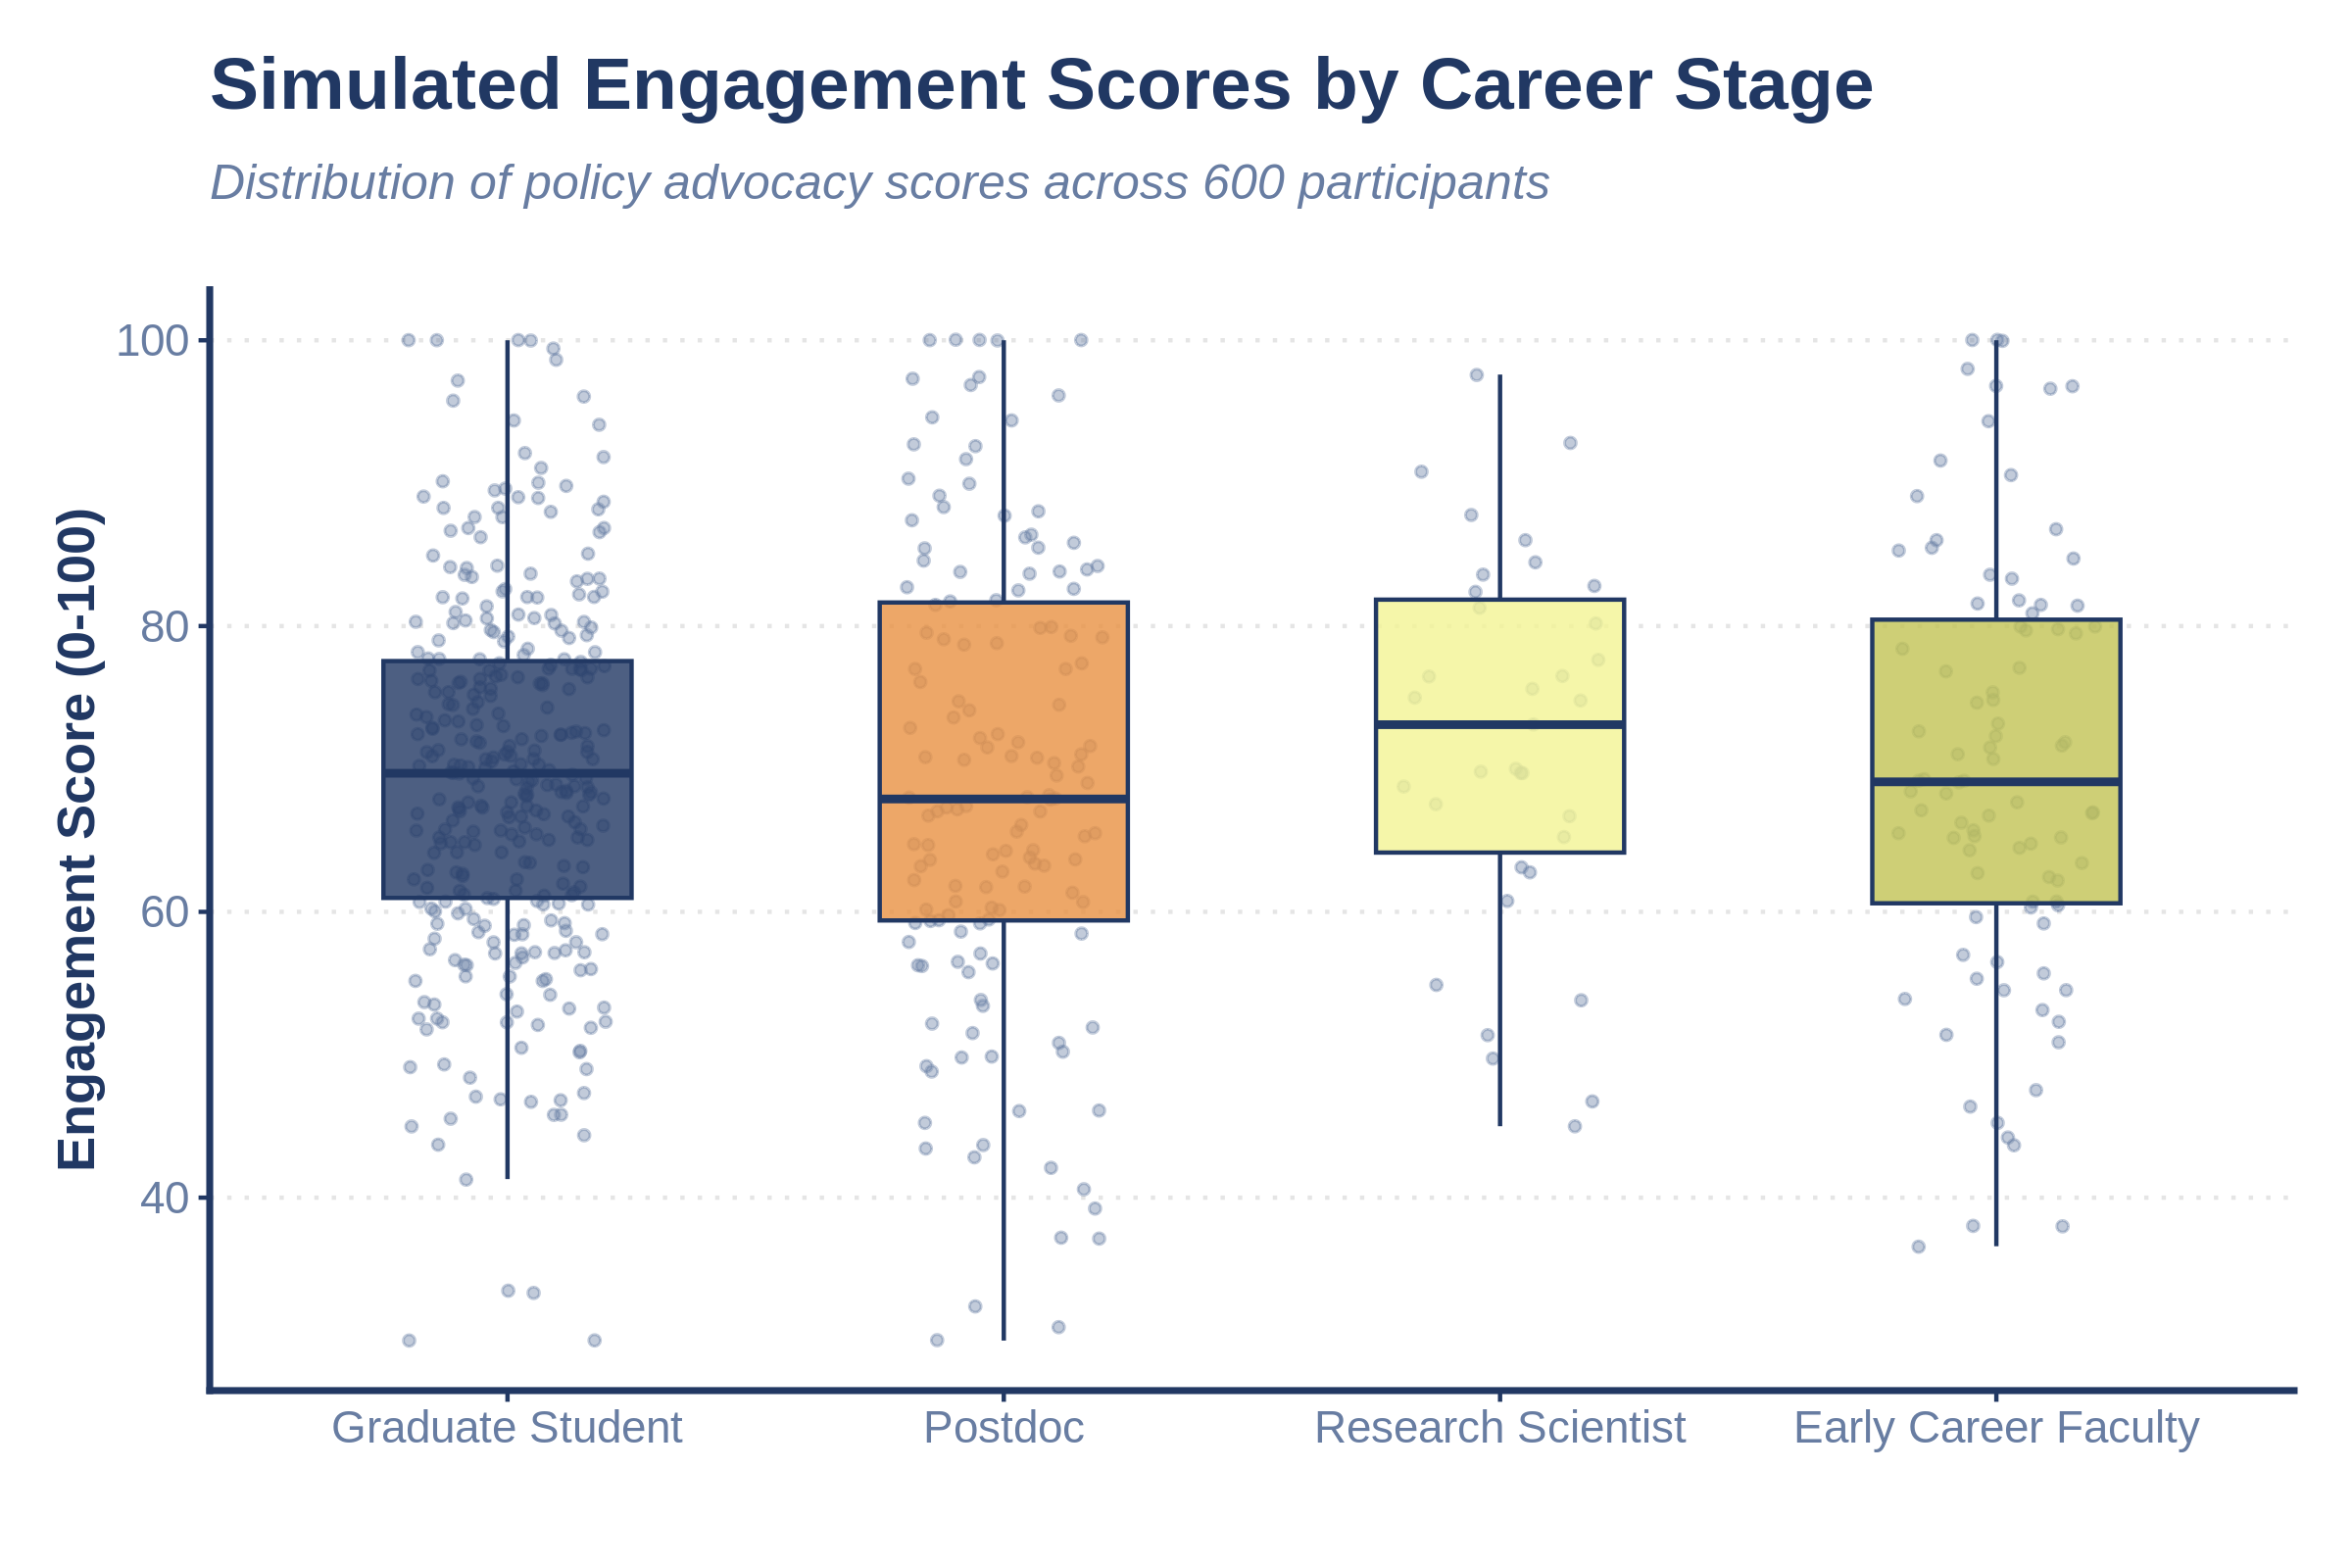

In [4]:
#@title **SNAP ggplot Theme**
%%R -w 2400 -h 1600 -r 300

library(ggplot2)

# --- 1. SNAP Theme Definition ---
SNAP_palette <- c("#213863", "#E89142", "#F2F493", "#C2C354", "#687DA2", "#F4D294", "#310A45")

theme_SNAP <- function() {
  theme_classic() +
    theme(
      # Typography
      plot.title = element_text(size = 18, face = "bold", hjust = 0, margin = margin(b = 10), family = "sans", color="#213863"),
      plot.subtitle = element_text(size = 12, face = "italic", hjust = 0, margin = margin(b = 20), family = "sans", color="#687DA2"),
      axis.title = element_text(size = 13, face = "bold", family = "sans", color="#213863"),
      axis.text = element_text(size = 11, family = "sans", color="#687DA2"),
      legend.title = element_text(size = 11, face = "bold", family = "sans", color="#213863"),
      legend.text = element_text(size = 10, family = "sans", color="#687DA2"),

      # Grid & Lines
      panel.grid.major.y = element_line(color = "gray90", linetype = "dotted"),
      panel.grid.major.x = element_blank(),
      axis.line = element_line(color = "#213863", linewidth = 0.8),
      axis.ticks = element_line(color = "#213863"),

      # Margins
      plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
    )
}

# --- 2. Create Box Plot ---
# We order the Career Stage factor so it appears logically on the axis
df_sim$Career_Stage <- factor(df_sim$Career_Stage,
    levels = c("Graduate Student", "Postdoc", "Research Scientist", "Early Career Faculty"))

p <- ggplot(df_sim, aes(x = Career_Stage, y = Engagement_Score, fill = Career_Stage)) +
  # Add jittered points first (so they are behind the box)
  geom_jitter(color = "#687DA2", width = 0.2, alpha = 0.4, size = 1) +
  # Add Boxplot
  geom_boxplot(alpha = 0.8, outlier.shape = NA, color = "#213863", width = 0.5) +

  # Apply SNAP Colors and Theme
  scale_fill_manual(values = SNAP_palette) +
  labs(
    title = "Simulated Engagement Scores by Career Stage",
    subtitle = "Distribution of policy advocacy scores across 600 participants",
    x = "", # Hide X label as categories are self-explanatory
    y = "Engagement Score (0-100)",
    fill = "Career Stage"
  ) +
  theme_SNAP() +
  # Small tweak to hide legend since x-axis labels are sufficient
  theme(legend.position = "none")

print(p)

In [5]:
#@title **SNAP Interactive Bokeh Theme**
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool
from bokeh.transform import factor_cmap
import math

output_notebook()

# --- 1. Data Aggregation ---
# Group by Field and sum Funding, then sort top 10
df_agg = df_sim.groupby('Field_of_Study')['Funding_Amount'].sum().reset_index()
df_agg = df_agg.sort_values('Funding_Amount', ascending=True).tail(10) # Top 10

# --- 2. Theme Helper ---
def apply_snap_theme(p):
    SNAP_BLUE = "#213863"
    SNAP_LIGHT = "#687DA2"

    p.title.text_font = "sans-serif"
    p.title.text_font_size = "16pt"
    p.title.text_color = SNAP_BLUE
    p.title.text_font_style = "bold"

    p.xaxis.axis_label_text_font_style = "bold"
    p.xaxis.axis_label_text_color = SNAP_BLUE
    p.yaxis.major_label_text_color = SNAP_LIGHT
    p.xaxis.major_label_text_color = SNAP_LIGHT

    p.xgrid.grid_line_color = "gray"
    p.xgrid.grid_line_alpha = 0.3
    p.ygrid.grid_line_color = None # Remove Y grid for horiz bars
    p.outline_line_color = None
    p.background_fill_color = "white"
    return p

# --- 3. Create Horizontal Bar Chart ---
source = ColumnDataSource(df_agg)
fields = df_agg['Field_of_Study'].tolist()

p = figure(
    y_range=fields, # Set categorical y-axis
    title="Simulated: Top 10 Fields by Total Research Funding",
    x_axis_label="Total Funding ($)",
    width=800, height=500,
    tools="save,hover"
)

# SNAP Palette (7 Original Colors)
SNAP_PALETTE = ["#213863", "#E89142", "#F2F493", "#C2C354", "#687DA2", "#F4D294", "#310A45"]

# FIX: Ensure palette is long enough for the number of fields (10)
# We repeat the palette list until it's longer than 'fields'
needed_length = len(fields)
extended_palette = SNAP_PALETTE * (math.ceil(needed_length / len(SNAP_PALETTE)))
final_palette = extended_palette[:needed_length]

p.hbar(
    y='Field_of_Study',
    right='Funding_Amount',
    height=0.7,
    source=source,
    # Use the extended palette
    fill_color=factor_cmap('Field_of_Study', palette=final_palette, factors=fields),
    line_color=None,
    fill_alpha=0.9
)

# Tooltips and Formatting
p.xaxis.formatter = NumeralTickFormatter(format="$0.0a") # e.g., $10m
hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ("Field", "@Field_of_Study"),
    ("Total Funding", "@Funding_Amount{$0,0 a}")
]

p = apply_snap_theme(p)

show(p)